# Decision Trees and Neural Networks

We will first be looking at decision trees which allow us to sort samples into categories based on questions we ask about the sample attributes.

Suppose we are asked to build a decision tree based on the experience of our company in hiring candidates.  The data we are supplied with consists of a tuple of (`input`, `label`) pairs.  The `label` tells us if the candidate was hired or not, whereas the `input` is a dictionary of the attribues: level, primary programming language, active twitter user and whether they have a Ph.D.

In [ ]:
import numpy as np

hire_data = [
    ({'level':'Senior', 'lang':'Java', 'tweets':'no', 'phd':'no'},    False),
    ({'level':'Senior', 'lang':'Java', 'tweets':'no', 'phd':'yes'},   False),
    ({'level':'Mid', 'lang':'Python', 'tweets':'no', 'phd':'no'},      True),
    ({'level':'Junior', 'lang':'Python', 'tweets':'no', 'phd':'no'},   True),
    ({'level':'Junior', 'lang':'R', 'tweets':'yes', 'phd':'no'},       True),
    ({'level':'Junior', 'lang':'R', 'tweets':'yes', 'phd':'yes'},     False),
    ({'level':'Mid', 'lang':'R', 'tweets':'yes', 'phd':'yes'},         True),
    ({'level':'Senior', 'lang':'Python', 'tweets':'no', 'phd':'no'},  False),
    ({'level':'Senior', 'lang':'R', 'tweets':'yes', 'phd':'no'},       True),
    ({'level':'Junior', 'lang':'Python', 'tweets':'yes', 'phd':'no'},  True),
    ({'level':'Senior', 'lang':'Python', 'tweets':'yes', 'phd':'yes'}, True),
    ({'level':'Mid', 'lang':'Python', 'tweets':'no', 'phd':'yes'},     True),
    ({'level':'Mid', 'lang':'Java', 'tweets':'yes', 'phd':'no'},       True),
    ({'level':'Junior', 'lang':'Python', 'tweets':'no', 'phd':'yes'}, False)
]


In order to build a decision tree to sort new applicants, we can follow a greedy algorithm to find the best decision nodes.

**Step 1:** If the data all have the same label, create a leaf node that predicts the label and then stop.

- Nope, there are a bunch of "False" and "True" labels currently, so we need to continue.

**Step 2:** If the list of attributes is empty (no more possible questions to ask) create a leaf node that predicts the most common label and then stop.

- No, we are just getting started.

**Step 3:** Partition the data by each of the attributes and calculate the partition entropy.

- Ok, now we can get to work

Remember that the entropy of a set $S$ that can be divided up into a number of classes $C_1, C_2, \ldots, C_n$ is

$$ H(S) = -p_1 \log_2 p_1 - p_2 \log_2 p_2 - \ldots - p_n \log_2 p_n $$

where $p_n$ is the proportion of the data belonging to class $C_n$

Then, the entropy of a partition (question that divides the data into sets) is 

$$ H = q_1H(S_1) + \ldots + q_mH(S_m) $$

where $q_m$ is the proportion of the data in set $S_n$

Let's start with the attribute `level`.  If we partition on level, there are 3 possibilities: Senior, Mid, and Junior.  These 3 are our sets.  'True' and 'False' are the classes those set items fall into.  So now we can calculate our $p$ and $q$ values.

In [ ]:
# Define a function to calculate the entropy of a set, given
# the proportion of data in each class (p_1 ... p_n)
# By convention, the entropy of an empty class is zero.

def entropy(pvec):
    H = 0
    for p in pvec:
        if p != 0: 
            H += -p*np.log2(p)
            
    return H

In [ ]:
# Define a function to calculate the entropy of a partition
# given an attribute to perform the partition, the possible
# values of the attribute, and the data set

def entropy_part(attr, sets, data):
    """
    H_part = entropy_part(attr, sets, data)
    calculates the entropy of a partition
    INPUTS: attr - attribute of the partition
            sets - list of possible values of the attribute
            data - input data 
    """
    q = np.zeros(len(sets))
    H = np.zeros(len(sets))

    nrecords = len(data)

    set_index = 0
    for S in sets:
        
        # There are two classes, true and false
        set_true = 0
        set_false = 0
        p_class = np.zeros(2)
        
        for samp in data:
            if samp[0][attr] == S:
                if samp[1] == True:
                    set_true += 1
                else:
                    set_false += 1
        
        nsamps = set_true + set_false
        if nsamps != 0:
            # proportion of samples in the true class per set
            p_class[0] = set_true/(nsamps)
            # proportion of samples in the false class per set
            p_class[1] = set_false/(nsamps)
    
        H[set_index] = np.sum(entropy(p_class))
        
        if nrecords != 0:
            q[set_index] = nsamps/nrecords
    
        set_index += 1
    
    H_part = np.dot(q,H)
  
    return H_part  

In [ ]:
attr = 'level'
sets = ['Senior', 'Mid', 'Junior']

H_part = entropy_part(attr, sets, hire_data)

print('Entropy of {} partition is {:.4f}'.format(attr, H_part))

Entropy of level partition is 0.6935


In [ ]:
attr = 'lang'
sets = ['Java', 'R', 'Python']

H_part = entropy_part(attr, sets, hire_data)

print('Entropy of {} partition is {:.4f}'.format(attr, H_part))

Entropy of lang partition is 0.8601


In [ ]:
attr = 'tweets'
sets = ['yes', 'no']

H_part = entropy_part(attr, sets, hire_data)

print('Entropy of {} partition is {:.4f}'.format(attr, H_part))

Entropy of tweets partition is 0.7885


In [ ]:
attr = 'phd'
sets = ['yes', 'no']

H_part = entropy_part(attr, sets, hire_data)

print('Entropy of {} partition is {:.4f}'.format(attr, H_part))

Entropy of phd partition is 0.8922


**Step 4:** Select the partition with the lowest entropy

- The `level` attribute partition gives the lowest entropy

**Step 5:** Add a decision node based on the chosen attribute

- We would add a level decision node.

Now our decision tree looks like this:

<img src="https://www.andrews.edu/~tzs/DataScience/decisiontree1.png" width=250>


**Step 6:** Apply steps 1-6 on all subsets


In [ ]:
# Break the data up into subsets

lev_senior_data = [record for record in hire_data if record[0]['level'] == 'Senior']
lev_mid_data = [record for record in hire_data if record[0]['level'] == 'Mid']
lev_junior_data = [record for record in hire_data if record[0]['level'] == 'Junior']

Let's start with the level = 'Senior' set.

**Step 1:** Do the data have the same label class?

In [ ]:
lev_senior_data

[({'lang': 'Java', 'level': 'Senior', 'phd': 'no', 'tweets': 'no'}, False),
 ({'lang': 'Java', 'level': 'Senior', 'phd': 'yes', 'tweets': 'no'}, False),
 ({'lang': 'Python', 'level': 'Senior', 'phd': 'no', 'tweets': 'no'}, False),
 ({'lang': 'R', 'level': 'Senior', 'phd': 'no', 'tweets': 'yes'}, True),
 ({'lang': 'Python', 'level': 'Senior', 'phd': 'yes', 'tweets': 'yes'}, True)]

No, there is a mixture of 'True' and 'False' labels.

**Step 2:** List of attributes used up?  - no

**Step 3:** Partition on remaining attributes and calculate partition entropy.

**Step 4:** Select the attribute with the lowest partition entropy.

In [ ]:
attr = 'lang'
sets = ['Java', 'R', 'Python']

H_part = entropy_part(attr, sets, lev_senior_data)

print('Entropy of {} partition is {:.4f}'.format(attr, H_part))

attr = 'tweets'
sets = ['yes', 'no']

H_part = entropy_part(attr, sets, lev_senior_data)

print('Entropy of {} partition is {:.4f}'.format(attr, H_part))

attr = 'phd'
sets = ['yes', 'no']

H_part = entropy_part(attr, sets, lev_senior_data)

print('Entropy of {} partition is {:.4f}'.format(attr, H_part))

Entropy of lang partition is 0.4000
Entropy of tweets partition is 0.0000
Entropy of phd partition is 0.9510


Tweets is the winner!

**Step 5:** Add a decision node based on the chosen attribute.

Now our decision tree looks like this

<img src='https://www.andrews.edu/~tzs/DataScience/decisiontree2.png' width=300>

**Step 6:** Apply steps 1-6 on all subsets

In [ ]:
# Break data into subsets
lev_senior_tweets_y = [record for record in lev_senior_data if record[0]['tweets'] == 'yes']
lev_senior_tweets_n = [record for record in lev_senior_data if record[0]['tweets'] == 'no']

Look at the 'tweets' = 'yes' subset

**Step 1:** Do the data have the same level class?

In [ ]:
lev_senior_tweets_y

[({'lang': 'R', 'level': 'Senior', 'phd': 'no', 'tweets': 'yes'}, True),
 ({'lang': 'Python', 'level': 'Senior', 'phd': 'yes', 'tweets': 'yes'}, True)]

Yes! Create a leaf node and then stop

The same goes for the 'tweets' = 'no' subset

In [ ]:
lev_senior_tweets_n

[({'lang': 'Java', 'level': 'Senior', 'phd': 'no', 'tweets': 'no'}, False),
 ({'lang': 'Java', 'level': 'Senior', 'phd': 'yes', 'tweets': 'no'}, False),
 ({'lang': 'Python', 'level': 'Senior', 'phd': 'no', 'tweets': 'no'}, False)]

So now we are done with the level = 'Senior' branch of our decision tree, which looks like this:

<img src='https://www.andrews.edu/~tzs/DataScience/decisiontree3.png' width=350>


In [ ]:
# Task 1: Apply the greedy algorithm to the level = 'Mid' set to 
# fill out that part of the decision tree

lev_mid_data



[({'lang': 'Python', 'level': 'Mid', 'phd': 'no', 'tweets': 'no'}, True),
 ({'lang': 'R', 'level': 'Mid', 'phd': 'yes', 'tweets': 'yes'}, True),
 ({'lang': 'Python', 'level': 'Mid', 'phd': 'yes', 'tweets': 'no'}, True),
 ({'lang': 'Java', 'level': 'Mid', 'phd': 'no', 'tweets': 'yes'}, True)]

In [ ]:
# Task 2: Apply the greedy algorithm to the level = 'Junior' set
# to fill out that part of the decision tree

lev_junior_data

[({'lang': 'Python', 'level': 'Junior', 'phd': 'no', 'tweets': 'no'}, True),
 ({'lang': 'R', 'level': 'Junior', 'phd': 'no', 'tweets': 'yes'}, True),
 ({'lang': 'R', 'level': 'Junior', 'phd': 'yes', 'tweets': 'yes'}, False),
 ({'lang': 'Python', 'level': 'Junior', 'phd': 'no', 'tweets': 'yes'}, True),
 ({'lang': 'Python', 'level': 'Junior', 'phd': 'yes', 'tweets': 'no'}, False)]

In [ ]:
attr = 'lang'
sets = ['Java', 'R', 'Python']

H_part = entropy_part(attr, sets, lev_junior_data)

print('Entropy of {} partition is {:.4f}'.format(attr, H_part))

attr = 'tweets'
sets = ['yes', 'no']

H_part = entropy_part(attr, sets, lev_junior_data)

print('Entropy of {} partition is {:.4f}'.format(attr, H_part))

attr = 'phd'
sets = ['yes', 'no']

H_part = entropy_part(attr, sets, lev_junior_data)

print('Entropy of {} partition is {:.4f}'.format(attr, H_part))

Entropy of lang partition is 0.9510
Entropy of tweets partition is 0.9510
Entropy of phd partition is 0.0000


In [ ]:
# Break data into subsets
lev_junior_tweets_y = [record for record in lev_junior_data if record[0]['phd'] == 'yes']
lev_junior_tweets_n = [record for record in lev_junior_data if record[0]['phd'] == 'no']

In [ ]:
lev_junior_tweets_y

[({'lang': 'R', 'level': 'Junior', 'phd': 'yes', 'tweets': 'yes'}, False),
 ({'lang': 'Python', 'level': 'Junior', 'phd': 'yes', 'tweets': 'no'}, False)]

In [ ]:
lev_junior_tweets_n

[({'lang': 'Python', 'level': 'Junior', 'phd': 'no', 'tweets': 'no'}, True),
 ({'lang': 'R', 'level': 'Junior', 'phd': 'no', 'tweets': 'yes'}, True),
 ({'lang': 'Python', 'level': 'Junior', 'phd': 'no', 'tweets': 'yes'}, True)]

In [ ]:
# Task 3: Complete the ascii art decision tree below, showing your
# completed tree

"""
                      L E V E L
                 /        |       \
               Senior    Mid    Junior
               /          |         \
            tweets       hire       phd
             / \                    / \
           yes  no               yes   no
           /     \                /     \ 
       hire    no hire         no hire  hire
""";

## Neural Networks

We will be building a neural network to defeat a too-simple CAPCHA.  The CAPCHA consists of a picture of a single digit, made up of 25 pixels.  We want our nural network to take as input those pixel values and output the number that it correponds to.

Our training data inputs will consist of all of the possible numbers.

In [ ]:
zero_digit = [1,1,1,1,1,  # the 1s are the pixels that are dark
              1,0,0,0,1,  # can you see the zero?
              1,0,0,0,1,
              1,0,0,0,1,
              1,1,1,1,1]

one_digit = [0,0,1,0,0, #   *
             0,0,1,0,0, #   *
             0,0,1,0,0, #   *
             0,0,1,0,0, #   *
             0,0,1,0,0] #   *

two_digit = [1,1,1,1,1, # *****
             0,0,0,0,1, #     *
             1,1,1,1,1, # *****
             1,0,0,0,0, # *
             1,1,1,1,1] # *****

thr_digit = [1,1,1,1,1, # *****
             0,0,0,0,1, #     *
             1,1,1,1,1, # *****
             0,0,0,0,1, #     *
             1,1,1,1,1] # *****

fou_digit = [1,0,0,0,1, # *   *
             1,0,0,0,1, # *   *
             1,1,1,1,1, # *****
             0,0,0,0,1, #     *
             0,0,0,0,1] #     *

fiv_digit = [1,1,1,1,1, # *****
             1,0,0,0,0, # *    
             1,1,1,1,1, # *****
             0,0,0,0,1, #     *
             1,1,1,1,1] # *****

six_digit = [1,1,1,1,1, # *****
             1,0,0,0,0, # *    
             1,1,1,1,1, # *****
             1,0,0,0,1, # *   *
             1,1,1,1,1] # *****

sev_digit = [1,1,1,1,1, # *****
             0,0,0,0,1, #     *
             0,0,0,0,1, #     *
             0,0,0,0,1, #     *
             0,0,0,0,1] #     *
            
eig_digit = [1,1,1,1,1, # *****
             1,0,0,0,1, # *   *
             1,1,1,1,1, # *****
             1,0,0,0,1, # *   *
             1,1,1,1,1] # *****

nin_digit = [1,1,1,1,1, # *****
             1,0,0,0,1, # *   *
             1,1,1,1,1, # *****
             0,0,0,0,1, #     *
             1,1,1,1,1] # *****

inputs = [zero_digit, one_digit, two_digit, thr_digit,
          fou_digit, fiv_digit, six_digit, sev_digit,
          eig_digit, nin_digit]

We want our output to indicate which digit the neural network thinks it is, so we'll need 10 outputs.  The correct output for digit 4, for instance, would be:

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

so assuming the inputs are ordered from 0 to 9, the corresponding target outputs would be:

In [ ]:
targets = [[1 if i == j else 0 for i in range(10)] for j in range(10)]

In [ ]:
print(targets)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]


In [ ]:
print(targets[4])

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


Now we are ready to build our neural network

In [ ]:
import random

random.seed(0)   # to get repeatable results
input_size = 25  # each input is a vector of length 25 (pixels)
num_hidden = 5   # 5 neurons in the hidden layer
output_size = 10 # output vector of length 10

In [ ]:
# Each hidden neuron has one weight per input, plus a bias weight

hidden_layer = [[random.random() for _ in range(input_size + 1)]
                for _ in range(num_hidden)]

In [ ]:
# Each output neuron has one weight per hidden neuron, plus a bias weight

output_layer = [[random.random() for _ in range(num_hidden + 1)]
                for _ in range(output_size)]

In [ ]:
# The network starts out with random weights

network = [hidden_layer, output_layer]

We have set up our neural network, now we need to train it with our inputs and target outputs.  We can do this with a series of back propagation and feed forward steps.

### Feed forward

Feeding forward means to run through the neural network, one layer at a time to go from inputs to outputs.

In [ ]:
import math

# Define the sigmoid function which returns a zero for inputs
# slightly less than zero and a one for inputs slightly greater
# than zero and varies smoothly in between.
def sigmoid(t):
    return 1 / (1 + math.exp(-t))

# Compute the neuron output based on weights and inputs
def neuron_output(weights, inputs):
    return sigmoid(np.dot(weights, inputs))

def feed_forward(neural_network, input_vector):
    """takes in a neural network (represented as a list of 
    lists of lists of weights) and returns the output from 
    forward-propagating the input"""

    outputs = []

    for layer in neural_network:

        input_with_bias = input_vector + [1]             # add a bias input
        output = [neuron_output(neuron, input_with_bias) # compute the output
                  for neuron in layer]                   # for this layer
        outputs.append(output)                           # and remember it

        # the input to the next layer is the output of this one
        input_vector = output

    return outputs

Let's try running a feed-forward on our untrained network

In [ ]:
hidden, output = feed_forward(network, inputs[4])
print(output)

[0.927214123782649, 0.8741070411267978, 0.9612981708065071, 0.9694698718136389, 0.9339265462644313, 0.9324102446962134, 0.9390268649713612, 0.8963385066787134, 0.9748845384014487, 0.8617949754010217]


The output of our neural network is rubbish, but what did we expect?  We haven't trained it yet!

### Backpropagation
With backpropagation, we work backwards through our neural network, ajusting the weights so that the desired ouptuts are trained into the network.  Backpropagation iterates over the following algorithm:

1. Run feed_forward on an input vector to produce the outputs of all of the neurons in the network.
2. This results in an error for each output neuron-the difference between its output and its target.
3. Compute the gradient of this error as a function of the neuron's weights and adjust the weights in the direction that most decreases the error.
4. "Propagate" these output errors backward to infer errors for the hidden layer.
5. "Compute the gradients of these errors and adjust the hidden layer's weights in the same manner.

In [ ]:
def backpropagate(network, input_vector, target):

    hidden_outputs, outputs = feed_forward(network, input_vector)

    # the output * (1 - output) is from the derivative of sigmoid
    output_deltas = [output * (1 - output) * (output - target[i])
                     for i, output in enumerate(outputs)]

    # adjust weights for output layer (network[-1])
    for i, output_neuron in enumerate(network[-1]):
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            output_neuron[j] -= output_deltas[i] * hidden_output

    # back-propagate errors to hidden layer
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                      np.dot(output_deltas, [n[i] for n in network[-1]])
                     for i, hidden_output in enumerate(hidden_outputs)]

    # adjust weights for hidden layer (network[0])
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input

Now we can train!

In [ ]:
# 10,000 iterations seems enough to converge
for __ in range(10000):
    for input_vector, target_vector in zip(inputs, targets):
        backpropagate(network, input_vector, target_vector)

Try again with an input of 4

In [ ]:
hidden, output = feed_forward(network, inputs[4])
print(' '.join('{:.2f}'.format(num) for num in output))


0.00 0.02 0.01 0.00 0.99 0.00 0.00 0.00 0.00 0.00


In [ ]:
# Task 4 Display the neural network ouput for the number 9 input

hidden, output = feed_forward(network, inputs[9])
print(' '.join('{:.2f}'.format(num) for num in output))

0.00 0.00 0.00 0.01 0.00 0.01 0.00 0.00 0.03 0.95


Hooray!  Only the output associated with 4 is close to 1!  The neural network can now correctly identify our inputs.

Of course, we tested our neural network with a piece of the training data so it **should** work well.  What if we have an input that is close to, but not quite, our training data?

In [ ]:
different_three = [0,1,1,1,0, #  *** 
                   0,0,0,1,1, #    **
                   0,0,1,1,0, #   ** 
                   0,0,0,1,1, #    **
                   0,1,1,1,0] #  *** 

hidden, output = feed_forward(network, different_three)
print(' '.join('{:.2f}'.format(num) for num in output))

0.00 0.00 0.00 0.99 0.00 0.00 0.00 0.04 0.00 0.26


3 is designated as being highly likely but it is (sometimes) not the only one.

In [ ]:
# Task 5 create a data set for a different 1 and display
# the output of the trained network on that set.

different_one =   [0,0,1,0,0, #   *
                   0,1,1,0,0, #  **
                   1,0,1,0,0, # * *
                   0,0,1,0,0, #   *
                   1,1,1,1,1] # ****** 

hidden, output = feed_forward(network, different_one)
print(' '.join('{:.2f}'.format(num) for num in output))

0.00 0.99 0.42 0.00 0.01 0.00 0.00 0.00 0.00 0.00


Just for fun, let's make some plots of the weights of the hidden neurons so we can see how they look.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def show_weights(neuron_idx):
    weights = network[0][neuron_idx]
    abs_weights = [abs(weight) for weight in weights]

    grid = [abs_weights[row:(row+5)] # turn the weights into a 5x5 grid
            for row in range(0,25,5)] # [weights[0:5], ..., weights[20:25]]

    ax = plt.gca() # to use hatching, we'll need the axis

    ax.imshow(grid, # here same as plt.imshow
              cmap=matplotlib.cm.Blues, # use white-black color scale
              interpolation='none') # plot blocks as blocks

    plt.show()

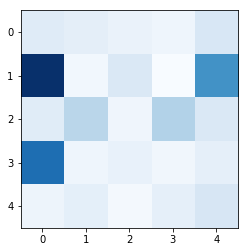

In [ ]:
show_weights(0)

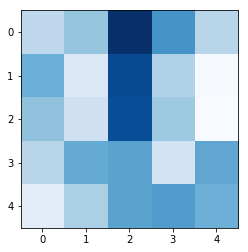

In [ ]:
show_weights(1)

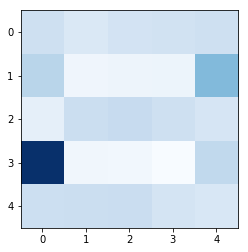

In [ ]:
show_weights(2)

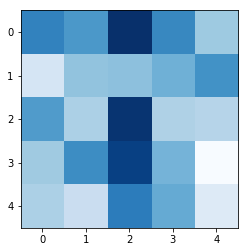

In [ ]:
show_weights(3)

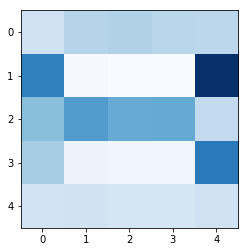

In [ ]:
show_weights(4)

It looks like our hidden neurons 1 and 3 would both fire strongly on inputs[1] since they are sensitive to central, vertical pixels.  Let's see if we are right.

In [ ]:
hidden, output = feed_forward(network, inputs[1])
print(hidden)

[0.0001848992833641413, 0.9995057778648715, 0.9997038490884612, 0.9993306164826646, 0.7173676990713651]


Hey, we were right.

In [ ]:
# Task 6: Make a prediction for which hidden layer neurons 
# will fire strongly for inputs[7].  Run the network on
# this input and print the hidden layer outputs

hidden, output = feed_forward(network, inputs[7])
print(hidden)

[5.6682748491307504e-09, 0.9993146463418915, 0.08703816693214435, 0.9998023404893324, 1.115510073774802e-06]
